Name : Ashwini Giri,                                                                  USC ID: 5413882039

# 2. Forest Fire Data

In this exercise, we investigate a difficult regression task, where the aim is to predict
the burned area of forest fires in the northeast region of Portugal.


(a) Download the Forest Fire data from: https://archive.ics.uci.edu/ml/datasets/
Forest+Fires.

Answer: Downloaded the dataset and stored on local directory

(b) Exploring the data:


i. How many rows are in this data set? How many columns? What do the rows and columns represent?

Answer: Each row of the data corresponds to one forest ﬁre and each column represents some attribute of each forest ﬁre. 
The data contains 13 attributes(columns) and 517 samples(rows). 

The attributes contain the following information:

Label Description


X: x-axis spatial coordinate within the Montesinho park map: 1 to 9
Y: y-axis spatial coordinate within the Montesinho park map: 2 to 9
month: month of the year: “jan” to “dec”
day: day of the week: “mon” to “sun”
FFMC: FFMC index from the FWI system: 18.7 to 96.20
DMC: DMC index from the FWI system: 1.1 to 291.3
DC: DC index from the FWI system: 7.9 to 860.6
ISI: ISI index from the FWI system: 0.0 to 56.10
temp: temperature in Celsius degrees: 2.2 to 33.30
RH: relative humidity in %: 15.0 to 100
wind: wind speed in km/h: 0.40 to 9.40
rain: outside rain in mm/m2 : 0.0 to 6.4
area: the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


ii. Explain why the transformation Y1 = ln(1 + Y ), where Y is the response variable is useful for this dataset. In the following, use Y1 as the new response variable.

Answer: The data is not distributed normally for Y, the response variable rather it is right skewed. This output variable is very skewed towards 0.0, thus it we are applying the transformation ln(1+Y) to reduce the skewness of the response variable.
Hence to normalize the data and reduce the skeweness we are applying the transformation Y1 = ln(1 + Y ) and using Y1 as the new response variable.

iii. Make pairwise scatterplots of the predictors (columns) in this data set with the dependent variable. 
Describe your findings.

All library imports

In [3]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns; sns.set()
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d

In [150]:
data = pd.read_csv("forestfires.csv")
data['area'] = pd.DataFrame(np.log(1 + np.array(data['area'])), columns = ['area'])
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

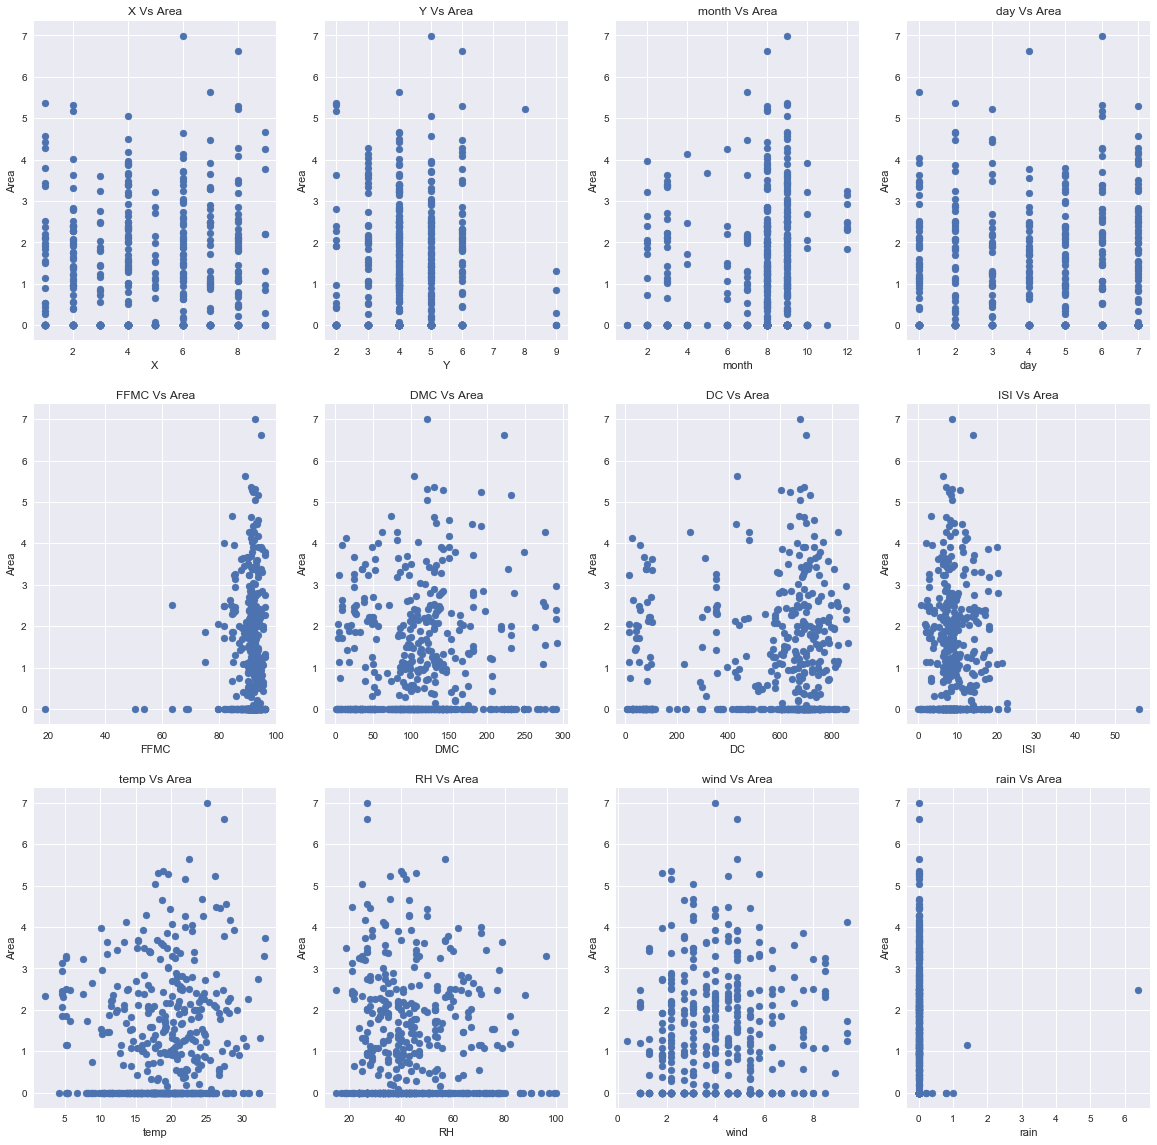

In [157]:
predictors=["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

plt.figure(figsize=(20,20))
i=1
for p in predictors:
    plt.subplot(3,4,i)
    plt.scatter(data[p],data['area'])
    plt.xlabel(p)
    plt.ylabel('Area')
    tit = p + " Vs Area"
    plt.title(tit)
    i+=1
plt.show()

In few predictors the data is mostly clustered in particular regions and for few predictors data is scattered all over the region.

iv. Make at least 16 pairwise scatterplots of predictors of your choice and describe your findings. 
You are welcome to make all possible scatter plots.

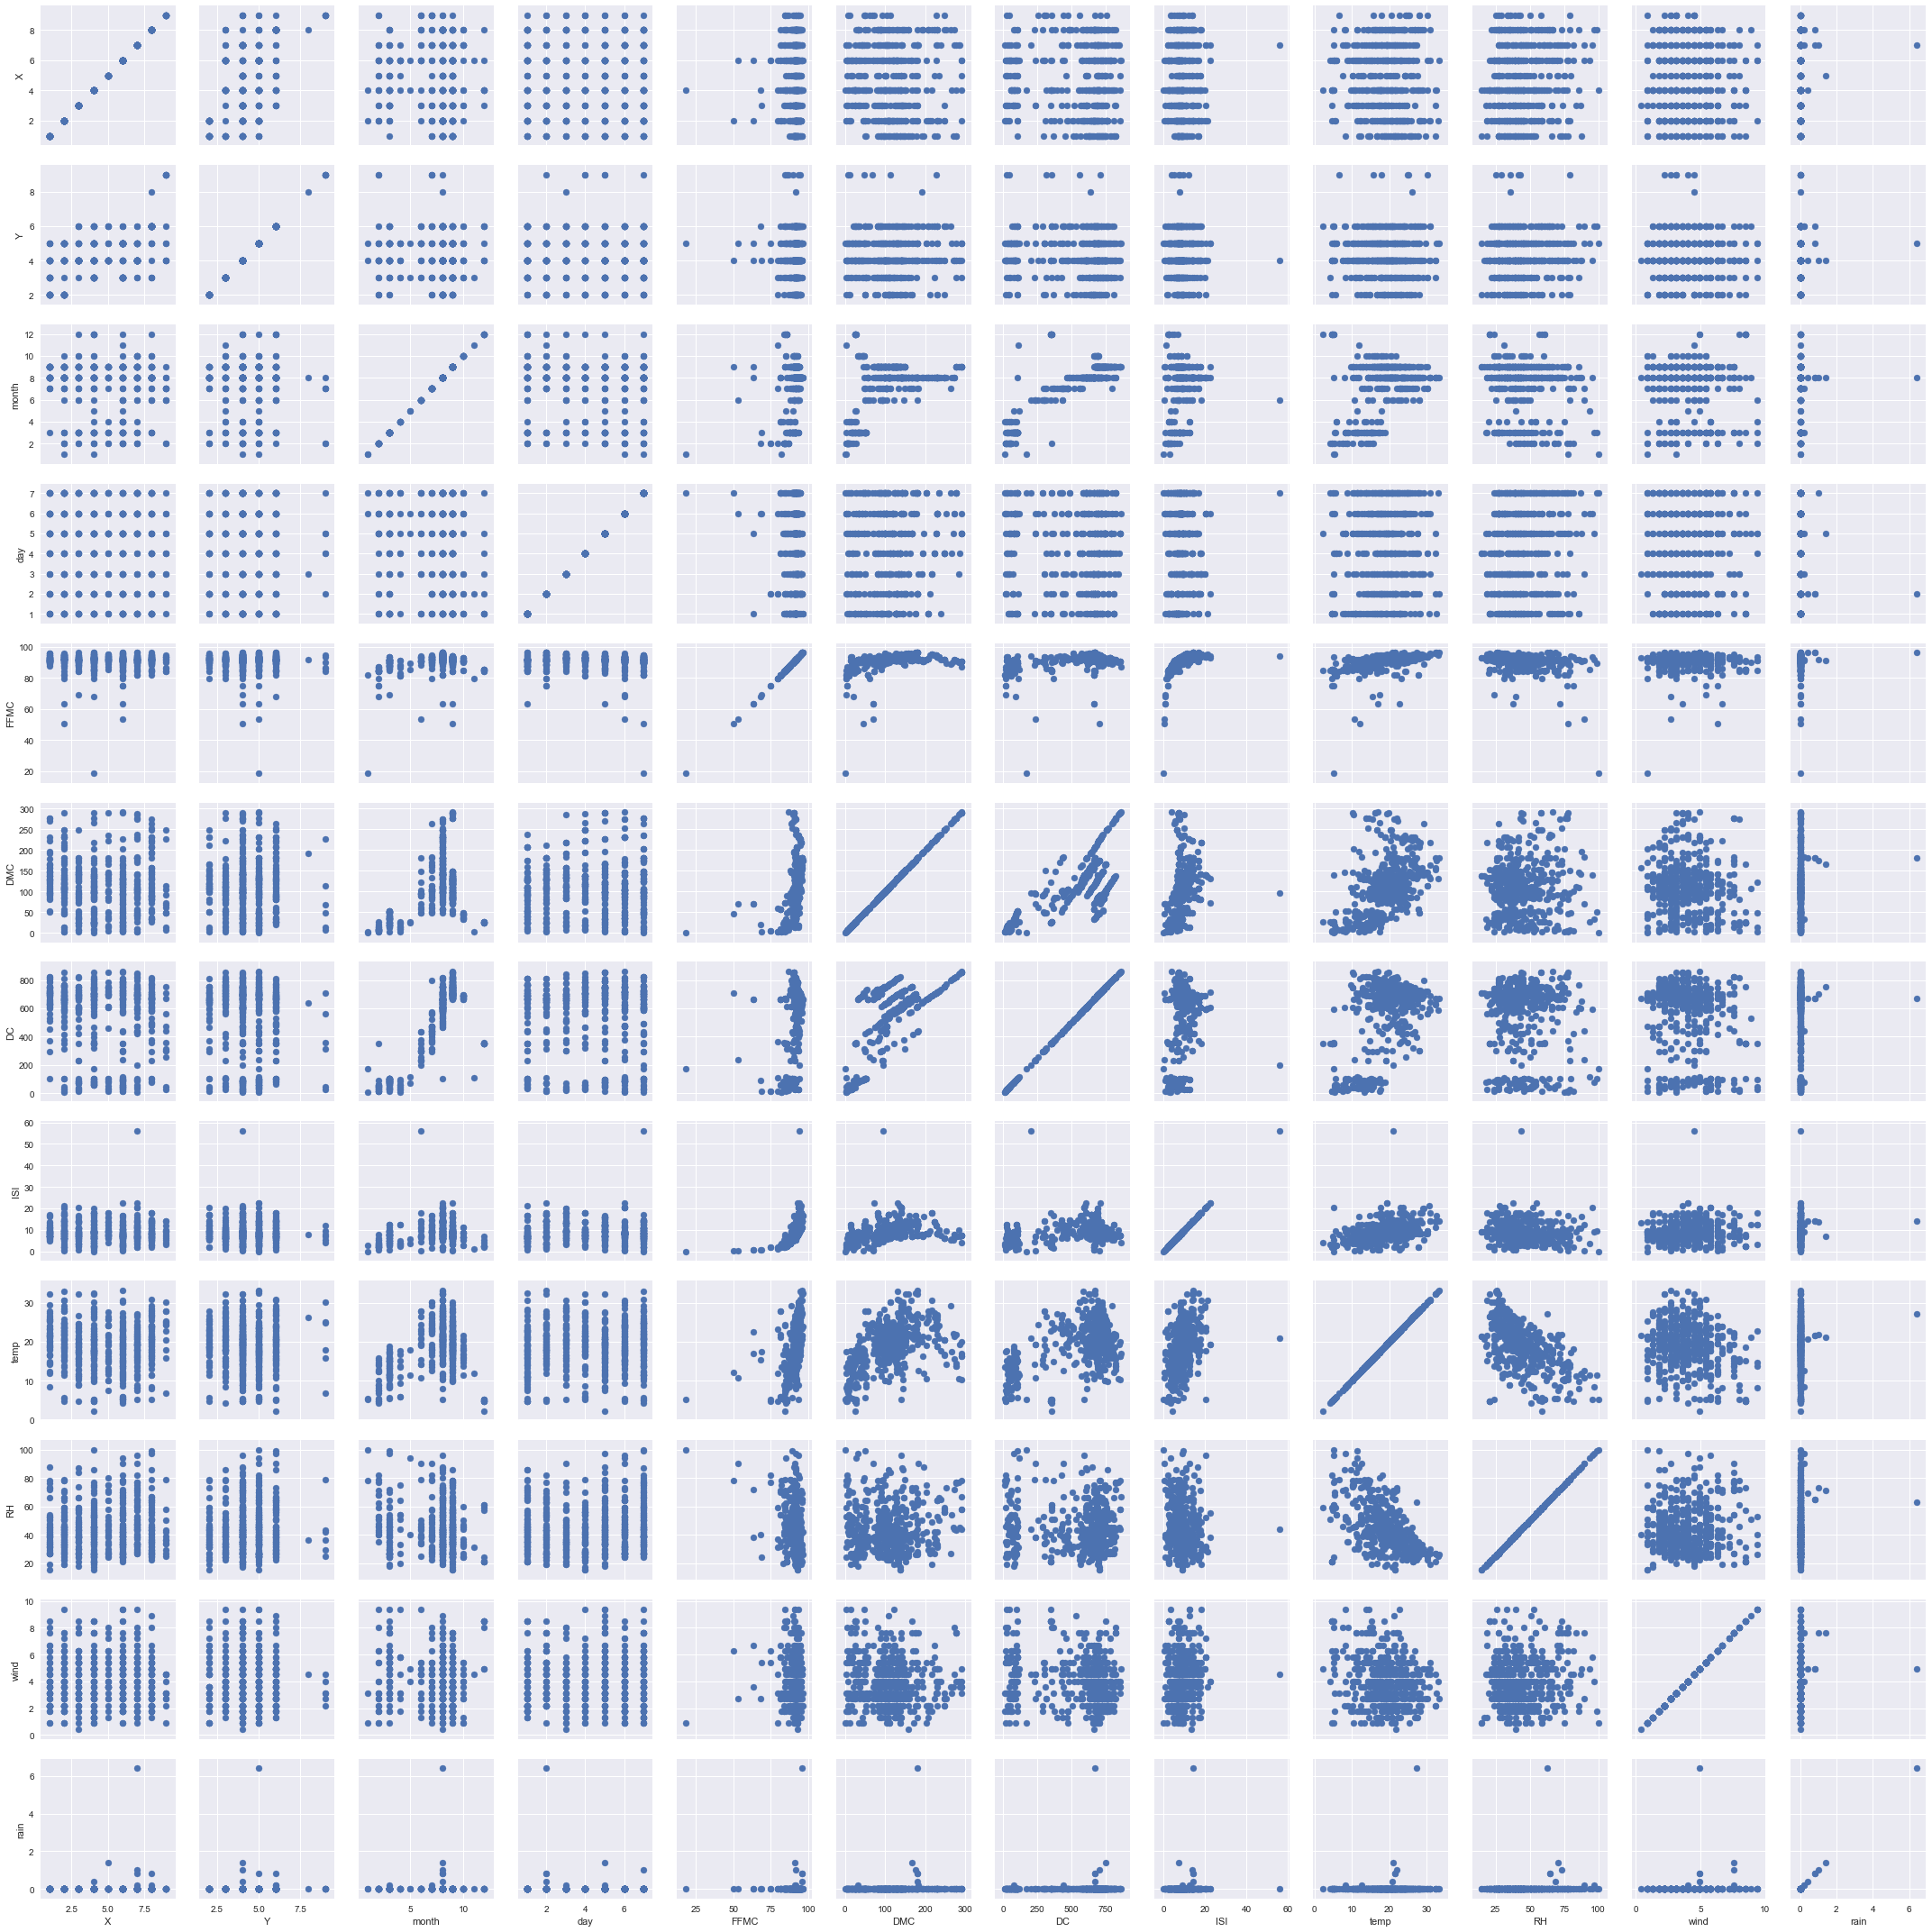

In [158]:
g = sns.PairGrid(data, vars=predictors)
g = g.map(plt.scatter)

For predictors X, Y, month and day the data is linearly aligned when plotted against the rest of the predictos.

For data of predictor FFMC is linearly aligned against predictors X, Y, month and day but clustered in the upper region of the remaining predictors

For rest all other predictors the data is clustered in some region and very sparsely present in rest of the regions in the same graph

v. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? 
Summarize them in a table.

In [159]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [171]:
p_val = {}
reg_coef = {}
for p in predictors:
    fo = 'area ~ '+p
    lm = smf.ols(formula=fo, data = data).fit()
    (trainData,testData,trainLabel,testLabel)= train_test_split(data[[p]],data[['area']],test_size=0.3)
    X = sm.add_constant(trainData)

    est = sm.OLS(trainLabel,X)
    est2 = est.fit()
    print(est2.summary())
    pv = est2.pvalues[1]
    co = est2.params[1]
    reg_coef[p] = co
    #print(co)
    if pv<0.05:
        print("The predictor "+p+" has pvalue less than 0.05 which provides a statistically significant association between the predictor and the response")
    p_val[p] = pv
    

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9009
Date:                Thu, 01 Feb 2018   Prob (F-statistic):              0.343
Time:                        10:33:39   Log-Likelihood:                -621.98
No. Observations:                 361   AIC:                             1248.
Df Residuals:                     359   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9733      0.167      5.824      0.0

In [186]:
simp_coef = []
for values in reg_coef.values():
    simp_coef.append(values)


X - area coefficient =  [ 0.04982431]
Y - area coefficient =  [-0.00352587]
month - area coefficient =  [ 0.0573399]
day - area coefficient =  [-0.008469]
FFMC - area coefficient =  [ 0.01681737]
DMC - area coefficient =  [ 0.00280053]
DC - area coefficient =  [ 0.00039143]
ISI - area coefficient =  [-0.00219501]
temp - area coefficient =  [ 0.01636481]
RH - area coefficient =  [-0.0046566]
wind - area coefficient =  [ 0.00565227]
rain - area coefficient =  [-2.07691468]


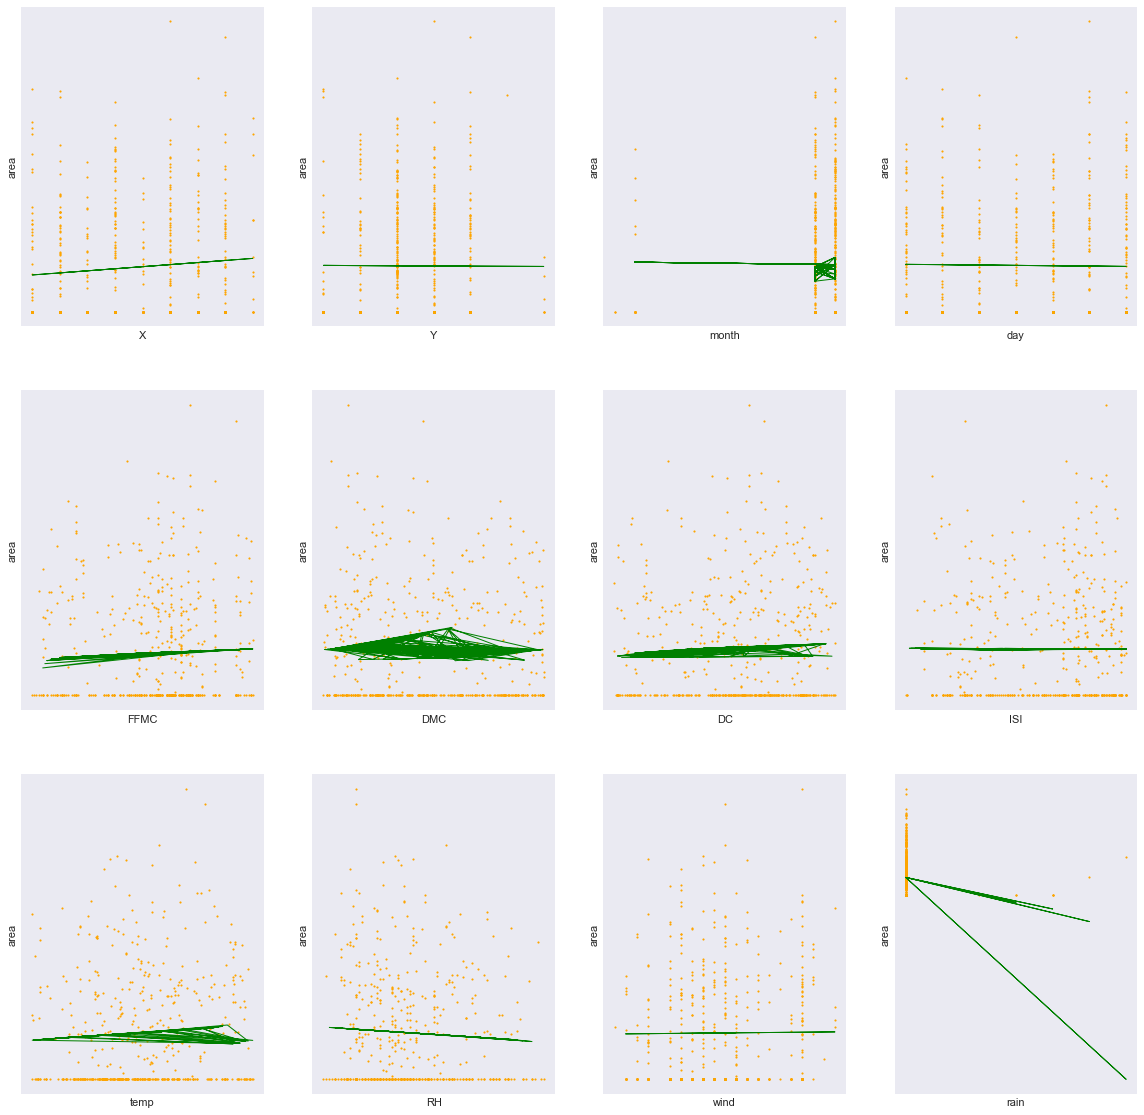

In [322]:
header = data.columns.tolist()
plt.figure(figsize=(20,20))
for i,items in enumerate(header[0:12]):
    df_x = data[[items]]
    df_y = data['area']
    x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.3)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    plt.subplot(3,4,i+1)
    plt.scatter(df_x,df_y,s=3, color = 'orange')
    prediction = reg.predict(x_test)
    plt.plot(x_test,prediction,color = 'green', linewidth = 1)
    plt.xlabel(items)
    plt.ylabel('area')
    plt.yticks(())
    plt.xticks(())
    print(items,'- area' , 'coefficient = ',reg.coef_)
plt.show()

The predictor month, DMC, DC and wind has pvalue less than 0.05 which means the null hypothesis can be rejected and hence it provides a statistically significant association between the predictor and the response


(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [328]:
lm = smf.ols(formula='area ~ X+Y+month+day+FFMC+DMC+DC+ISI+temp+RH+wind+rain',data=data).fit()
co = lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sat, 03 Feb 2018   Prob (F-statistic):             0.0745
Time:                        00:43:48   Log-Likelihood:                -896.50
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     504   BIC:                             1874.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3048      1.386     -0.220      0.8

As seen from the summary, pvalue for predictor 'month' is less than 0.05, hence we can reject the null hypothesis for predictor 'month'

(e) How do your results from 2c compare to your results from 2d? Create a plot displaying the univariate regression coefficients from 2c on the x-axis, and the multiple regression coefficients from 2d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Answer: As compared to 2(c) the pvalue for predictors 'DMC','DC' and 'wind' is changed in multiple regression. In 2(c) for predictor predictors 'month','DMC','DC' and 'wind' null hypothesis can be rejected but for multiple regression the hypothesis can be rejected only for predictor 'wind'.

Plot for displaying the univariate regression coefficients from 2c on the x-axis, and the multiple regression coefficients from 2d on the y-axis.

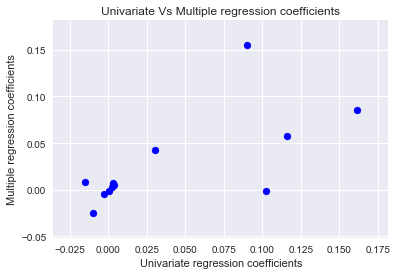

In [195]:
plt.scatter(simp_coef,co, color = 'blue')
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multiple regression coefficients')
plt.title('Univariate Vs Multiple regression coefficients')
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y1 =β0 +β1X+β2X2 +β3X3 +ε


/Users/ashwinigiri/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.029372474126743e-19 / 1.1102230246251565e-16
  RuntimeWarning)


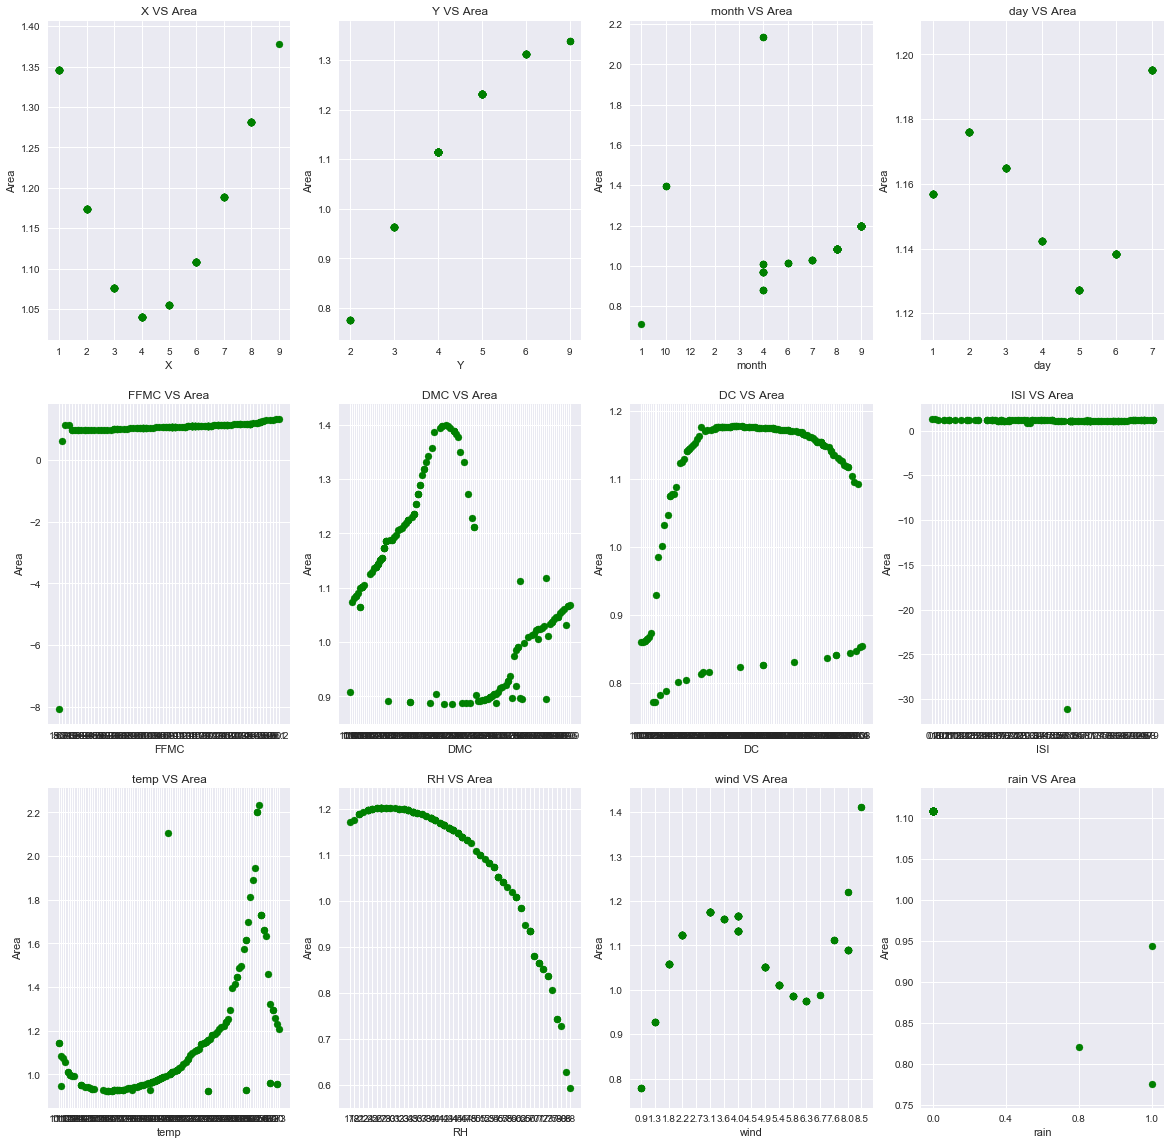

In [238]:
plt.figure(figsize=(20,20))
i=1
for p in predictors:
    (trainData,testData,trainLabel,testLabel)= train_test_split(data[[p]],data[['area']],test_size=0.3)
    model = make_pipeline(PolynomialFeatures(3), Ridge())
    model.fit(trainData, trainLabel)
    y_plot = model.predict(testData)
    plt.subplot(3,4,i)
    plt.scatter(testData, y_plot, color='green')
    tit = p+" VS Area"
    plt.xlabel(p)
    plt.ylabel("Area")
    plt.title(tit)
    i+=1

#plt.legend(loc='lower left')

plt.show()


In [335]:
data = pd.read_csv('forestfires.csv')
data['area'] = pd.DataFrame(np.log(1 + np.array(data['area'])), columns = ['area'])
# fo = 'area ~ X+(X*X)+(X*X*X)'
pval = {}
for p in predictors:
    fo = 'area ~ '+p+'+('+p+'*'+p+')+('+p+'*'+p+'*'+p+')'
    print(fo)
    lm = smf.ols(formula=fo,data=data).fit()
    co = lm.pvalues[1]
    pval[p] = co
    #print(lm.summary())
print(pval)

area ~ X+(X*X)+(X*X*X)
area ~ Y+(Y*Y)+(Y*Y*Y)
area ~ month+(month*month)+(month*month*month)
area ~ day+(day*day)+(day*day*day)
area ~ FFMC+(FFMC*FFMC)+(FFMC*FFMC*FFMC)
area ~ DMC+(DMC*DMC)+(DMC*DMC*DMC)
area ~ DC+(DC*DC)+(DC*DC*DC)
area ~ ISI+(ISI*ISI)+(ISI*ISI*ISI)
area ~ temp+(temp*temp)+(temp*temp*temp)
area ~ RH+(RH*RH)+(RH*RH*RH)
area ~ wind+(wind*wind)+(wind*wind*wind)
area ~ rain+(rain*rain)+(rain*rain*rain)
{'X': 0.15926147225498186, 'Y': 0.37816406478937914, 'month': 0.92596362261179965, 'day': 0.59041441282061347, 'FFMC': 0.28819256489687162, 'DMC': 0.12727898110746833, 'DC': 0.13184321788814685, 'ISI': 0.8144413001642874, 'temp': 0.22471600793018245, 'RH': 0.22319549839612929, 'wind': 0.12829983164379907, 'rain': 0.59692130580615399}


(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [280]:
import itertools
interaction_term = {}
iteration = list(itertools.combinations(predictors, 2))
for iteration in iteration:
    fo = 'area ~ '+iteration[0]+'+'+iteration[1]+'+'+iteration[0]+'*'+iteration[1]
    lm = smf.ols(formula=fo,data=data).fit()
    co = lm.params
    p = lm.pvalues[1]
    interaction_term[iteration] = p
    print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8501
Date:                Fri, 02 Feb 2018   Prob (F-statistic):              0.467
Time:                        18:50:42   Log-Likelihood:                -905.19
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     513   BIC:                             1835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6347      0.435      1.460      0.1

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3338
Date:                Fri, 02 Feb 2018   Prob (F-statistic):              0.801
Time:                        18:50:42   Log-Likelihood:                -905.96
No. Observations:                 517   AIC:                             1820.
Df Residuals:                     513   BIC:                             1837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1421      0.534      2.140      0.0

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.668
Date:                Fri, 02 Feb 2018   Prob (F-statistic):             0.0471
Time:                        18:50:42   Log-Likelihood:                -902.47
No. Observations:                 517   AIC:                             1813.
Df Residuals:                     513   BIC:                             1830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8073      0.304      2.660      0.0

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.232
Date:                Fri, 02 Feb 2018   Prob (F-statistic):              0.297
Time:                        18:50:43   Log-Likelihood:                -904.61
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     513   BIC:                             1834.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5790      0.340      1.703      0.0

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.367
Date:                Fri, 02 Feb 2018   Prob (F-statistic):             0.0700
Time:                        18:50:43   Log-Likelihood:                -902.92
No. Observations:                 517   AIC:                             1814.
Df Residuals:                     513   BIC:                             1831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3845      0.298      1.291      0.1

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1378
Date:                Fri, 02 Feb 2018   Prob (F-statistic):              0.937
Time:                        18:50:43   Log-Likelihood:                -906.26
No. Observations:                 517   AIC:                             1821.
Df Residuals:                     513   BIC:                             1838.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1432      0.137      8.345      0.0

In [279]:
best_pval = {}
for key,value in interaction_term.items():
    if value < 0.05:
        best_pval[key] = value
print(best_pval)

{('X', 'month'): 0.036949160017966685, ('X', 'DMC'): 0.027373355463241104, ('X', 'DC'): 0.03913056955054961, ('Y', 'RH'): 0.049455296552824303, ('month', 'RH'): 0.023196688420474138, ('month', 'rain'): 0.011816288568065865, ('temp', 'wind'): 0.0040460739314458777}


Yes there is an evidence of association of interactions of predictors with the response. As detected from the model the interations between the following predictors have there p-values less than 0.05 and hence the null hypothesis for these interactions can be rejected.


1) Predictor X and month have pvalue: 0.036949160017966685

2) Predictor X and DMC have pvalue: 0.027373355463241104

3) Predictor X and DC have pvalue: 0.03913056955054961

4) Predictor Y and RH have pvalue: 0.049455296552824303

5) Predictor month and RH have pvalue: 0.023196688420474138

6) Predictor month and rain have pvalue: 0.011816288568065865

7) Predictor temp and wind have pvalue: 0.0040460739314458777

The interaction between predictors temp and wind have the best p-value hence these could be said as the best interaction.

(h) Can you improve your model using possible interaction terms or nonlinear associ- ations and between the predictors and response? Train the model on a randomly selected 70% subset of the data and test it on the remaining points and report your train and test results.


In [303]:
for p in predictors: 
    (trainData,testData,trainLabel,testLabel)= train_test_split(data[[p]],data[['area']],test_size=0.3)

    reg = LinearRegression()
    reg.fit(trainData,trainLabel)
    pred = reg.predict(testData)
    pred1 = reg.predict(trainData)
    linMSE_test = mean_squared_error(testLabel,pred)
    linMSE_train = mean_squared_error(trainLabel,pred1)
#     linRsquare = r2_score(testLabel,pred)
    non_linear_model = make_pipeline(PolynomialFeatures(3),Ridge())
    non_linear_model.fit(trainData,trainLabel)
    poly_pred = non_linear_model.predict(testData)
    poly_pred1 = non_linear_model.predict(trainData)
    poly_MSE_test = mean_squared_error(testLabel,poly_pred)
    poly_MSE_train = mean_squared_error(trainLabel,poly_pred1)
#     poly_R_square = r2_score(testLabel,poly_pred)

    print("Linear Mean Square Error of %s on test data is %f: " %(p,linMSE_test))
    print("Linear Mean Square Error of %s on train data is %f: " %(p,linMSE_train))
    print("Non Linear Mean Square Error of %s on test data is %f: " %(p, poly_MSE_test))
    print("Non Linear Mean Square Error of %s on train data is %f: " %(p, poly_MSE_train))


Linear Mean Square Error of X on test data is 1.944933: 
Linear Mean Square Error of X on train data is 1.954641: 
Non Linear Mean Square Error of X on test data is 1.940630: 
Non Linear Mean Square Error of X on train data is 1.946295: 
Linear Mean Square Error of Y on test data is 1.976981: 
Linear Mean Square Error of Y on train data is 1.943250: 
Non Linear Mean Square Error of Y on test data is 1.971935: 
Non Linear Mean Square Error of Y on train data is 1.941246: 
Linear Mean Square Error of month on test data is 1.948811: 
Linear Mean Square Error of month on train data is 1.919871: 
Non Linear Mean Square Error of month on test data is 1.981176: 
Non Linear Mean Square Error of month on train data is 1.885366: 
Linear Mean Square Error of day on test data is 2.258033: 
Linear Mean Square Error of day on train data is 1.827543: 
Non Linear Mean Square Error of day on test data is 2.266977: 
Non Linear Mean Square Error of day on train data is 1.823645: 
Linear Mean Square Error

/Users/ashwinigiri/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.587851996711379e-20 / 1.1102230246251565e-16
  RuntimeWarning)


Answer: The model can be improved by using possible interaction terms

(i) KNN Regression: Note that for this problem, we have a mixture of categorical and quantitative predictors. There is not a unique way to define a distance metric in such a situation. Describe your findings and heuristics. Can your metric be specific to this problem? Use a reasonable distance metric to answer the following questions:

i. Use the first 4 predictors to perform k-nearest neighbor regression for this dataset. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k.

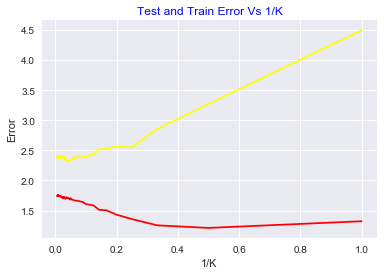

test_min  (24, 2.3138959699107904)
train min  (2, 1.2109908329619246)


In [291]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

columns = np.column_stack((data[['X']],data[['Y']],data[['month']],data[['day']]))
(trainData,testData,trainLabel,testLabel)= train_test_split(columns,data[['area']],test_size=0.3)
test_score_lst= {}
train_score_lst = {}
test_error_lst = []
train_error_lst = []
k_lst = []
for k in range(1,150):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainData, trainLabel)
    pred = neigh.predict(testData)
    pred1 = neigh.predict(trainData)
    testerror = mean_squared_error(testLabel,pred)
    trainerror = mean_squared_error(trainLabel,pred1)
#     print(error)
    test_score_lst[k] = testerror
    train_score_lst[k] = trainerror
    k_lst.append(1/k)
    test_error_lst.append(testerror)
    train_error_lst.append(trainerror)
#     score = neigh.score(testData,testLabel)
#     error = 1-score
#     if(score>=0 and score<1):
#         score_lst[k] = score
# mini = min(score_lst.items(), key=lambda score_lst: score_lst[1]) 
# print('min',mini)
plt.plot(k_lst,test_error_lst, color = 'yellow')
# plt.label('Test Error Vs 1/K')
plt.plot(k_lst, train_error_lst, color = 'red')
# plt.label('Train Error Vs 1/K')
plt.title('Test and Train Error Vs 1/K', color = 'blue')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.show()
mini_test = min(test_score_lst.items(), key=lambda test_score_lst: test_score_lst[1])
mini_train = min(train_score_lst.items(), key=lambda train_score_lst: train_score_lst[1]) 
print('test_min ',mini_test)
print('train min ',mini_train)

For the first four predictors as seen from the graph the minimum test error is achieved at k=24 and the error is 2.3138959699107904
and the minimum train error is achieved at k=2 and the error is 1.2109908329619246

ii. Use the last 4 predictors to perform k-nearest neighbor regression for this dataset. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k.


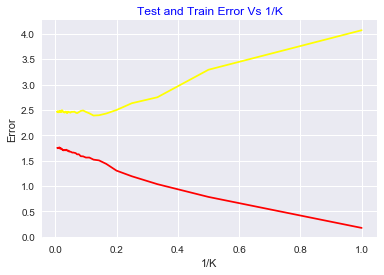

test_min  (8, 2.3891394044043874)
train min  (1, 0.17663390154294542)


In [292]:
columns = np.column_stack((data[['temp']],data[['RH']],data[['wind']],data[['rain']]))
(trainData,testData,trainLabel,testLabel)= train_test_split(columns,data[['area']],test_size=0.3)
test_score_lst= {}
train_score_lst = {}
test_error_lst = []
train_error_lst = []
k_lst = []
for k in range(1,150):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainData, trainLabel)
    pred = neigh.predict(testData)
    pred1 = neigh.predict(trainData)
    testerror = mean_squared_error(testLabel,pred)
    trainerror = mean_squared_error(trainLabel,pred1)
#     print(error)
    test_score_lst[k] = testerror
    train_score_lst[k] = trainerror
    k_lst.append(1/k)
    test_error_lst.append(testerror)
    train_error_lst.append(trainerror)
#     score = neigh.score(testData,testLabel)
#     error = 1-score
#     if(score>=0 and score<1):
#         score_lst[k] = score
# mini = min(score_lst.items(), key=lambda score_lst: score_lst[1]) 
# print('min',mini)
plt.plot(k_lst,test_error_lst, color = 'yellow')
# plt.label('Test Error Vs 1/K')
plt.plot(k_lst, train_error_lst, color = 'red')
# plt.label('Train Error Vs 1/K')
plt.title('Test and Train Error Vs 1/K', color = 'blue')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.show()
mini_test = min(test_score_lst.items(), key=lambda test_score_lst: test_score_lst[1])
mini_train = min(train_score_lst.items(), key=lambda train_score_lst: train_score_lst[1]) 
print('test_min ',mini_test)
print('train min ',mini_train)

For the last four predictors as seen from the graph the minimum test error is achieved at k=8 and the error is 2.3891394044043874 and the minimum train error is achieved at k=1 and the error is 0.17663390154294542

iii. Use predictors 1,2, 9, 10, 11 to perform k-nearest neighbor regression for this dataset. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k.

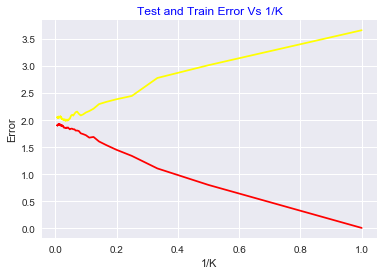

test_min  (29, 1.9858402519170106)
train min  (1, 0.0082293938693397475)


In [295]:
columns = np.column_stack((data[['X']],data[['Y']],data[['temp']],data[['RH']],data[['wind']]))
(trainData,testData,trainLabel,testLabel)= train_test_split(columns,data[['area']],test_size=0.3)
test_score_lst= {}
train_score_lst = {}
test_error_lst = []
train_error_lst = []
k_lst = []
for k in range(1,150):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainData, trainLabel)
    pred = neigh.predict(testData)
    pred1 = neigh.predict(trainData)
    testerror = mean_squared_error(testLabel,pred)
    trainerror = mean_squared_error(trainLabel,pred1)
#     print(error)
    test_score_lst[k] = testerror
    train_score_lst[k] = trainerror
    k_lst.append(1/k)
    test_error_lst.append(testerror)
    train_error_lst.append(trainerror)
#     score = neigh.score(testData,testLabel)
#     error = 1-score
#     if(score>=0 and score<1):
#         score_lst[k] = score
# mini = min(score_lst.items(), key=lambda score_lst: score_lst[1]) 
# print('min',mini)
plt.plot(k_lst,test_error_lst, color = 'yellow')
# plt.label('Test Error Vs 1/K')
plt.plot(k_lst, train_error_lst, color = 'red')
# plt.label('Train Error Vs 1/K')
plt.title('Test and Train Error Vs 1/K', color = 'blue')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.show()
mini_test = min(test_score_lst.items(), key=lambda test_score_lst: test_score_lst[1])
mini_train = min(train_score_lst.items(), key=lambda train_score_lst: train_score_lst[1]) 
print('test_min ',mini_test)
print('train min ',mini_train)

For the predictors 1,2,9,10,11 as seen from the graph the minimum test error is achieved at k=29 and the error is 1.9858402519170106 and the minimum train error is achieved at k=1 and the error is 0.0082293938693397475

(j) Compare the results of KNN Regression with linear regression and provide your analysis.

As compared to linear regression the errors are reduced in KNN regression.